**Step #0: PROBLEM STATEMENT**

Insurance.csv is a data listing the health insurance premium amount paid by individuals.

We would like to develop a model to predict the total dollar amount that customers are willing to pay given the following following attributes using Artificial Neural Networks

* Age
* Gender
* BMI
* Smoker

The model should be able to predict
* Health Insurance Premium Charges

**STEP #1: IMPORT LIBRARIES/DATASETS**

Data collected from https://www.kaggle.com/simranjain17/insurance

In [1]:
## Database Phase
import pandas as pd
import numpy as np

#Visualization Phase
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.pylab as pylab
%matplotlib inline
pd.set_option('display.max_columns', 500)
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

In [2]:
insurance = pd.read_csv('../input/insurance/insurance.csv')
insurance_copy=insurance.copy('../input/insurance/insurance.csv')

**STEP #2: DATA CLEANSING AND DATA TRANSFORMATION**

In [3]:
print ("The shape of the  data is (row, column):"+ str(insurance_copy.shape))
print (insurance_copy.info())

The shape of the  data is (row, column):(1338, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [4]:
df = insurance_copy

In [5]:
insurance_csv = ('../input/insurance/insurance.csv')
insurance = pd.read_csv('../input/insurance/insurance.csv')

In [6]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [8]:
insurance_copy.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [9]:
#Checking out the statistical parameters
insurance_copy.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [10]:
#Checking out the categories and their respective counts in each feature
print("sex:",insurance_copy.sex.value_counts())
print("-"*40)
print("smoker:",insurance_copy.smoker.value_counts())
print("-"*40)
print("age:",insurance_copy.age.value_counts())
print("-"*40)
print("bmi:",insurance_copy.bmi.value_counts())
print("-"*40)
print("children:",insurance_copy.children.value_counts())
print("-"*40)
print("charges:",insurance_copy.charges.value_counts())
print("-"*40)

sex: male      676
female    662
Name: sex, dtype: int64
----------------------------------------
smoker: no     1064
yes     274
Name: smoker, dtype: int64
----------------------------------------
age: 18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64
----------------------------------------
bmi: 32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64
----------------------------------------
children: 0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dty

In [11]:
#Check for missing values in pandas dataframe using isnull() function
print('Data columns with null values:',insurance_copy.isnull().sum())

Data columns with null values: age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [12]:
#Check for missing values in pandas dataframe using isna() function
df.isna().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

In [13]:
#Check for duplicate values, It returns a boolean series which is True only for Unique elements
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337    False
Length: 1338, dtype: bool

In [14]:
#Check how many rows have duplicate values
df.duplicated().sum()

1

In [15]:
# Extract duplicate rows
df.loc[df.duplicated(keep=False), :]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [16]:
# Remove duplicate row
df.drop_duplicates(inplace=True)

In [17]:
#Prints information about the DataFrame.
#The information contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values).
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [18]:
#Transform sex=male. It returns a boolean series and set it as 'True', else 'False'
df['sex'] == 'male'

0       False
1        True
2        True
3        True
4        True
        ...  
1333     True
1334    False
1335    False
1336    False
1337    False
Name: sex, Length: 1337, dtype: bool

In [19]:
#Transform sex=male. It returns a value as '1' if True, else '0' if False
(df['sex'] == 'male').astype(int)

0       0
1       1
2       1
3       1
4       1
       ..
1333    1
1334    0
1335    0
1336    0
1337    0
Name: sex, Length: 1337, dtype: int64

In [20]:
df['sex'] = (df['sex'] == 'male').astype(int)

In [21]:
#Transform smoker=yes. It returns a boolean series and set it as 'True', else 'False'
df['smoker'] == 'yes'

0        True
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337     True
Name: smoker, Length: 1337, dtype: bool

In [22]:
#Transform smoker=yes. It returns a value as '1' if True, else '0' if False
(df['smoker'] == 'yes').astype(int)

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1337, dtype: int64

In [23]:
df['smoker'] = (df['smoker'] == 'yes').astype(int)

In [24]:
#Returns the first 5 rows of the dataframe
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [25]:
#Returns the last 5 rows of the dataframe
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,1,30.97,3,0,northwest,10600.5483
1334,18,0,31.92,0,0,northeast,2205.9808
1335,18,0,36.85,0,0,southeast,1629.8335
1336,21,0,25.80,0,0,southwest,2007.9450
1337,61,0,29.07,0,1,northwest,29141.3603


In [26]:
#To find which User paid lowest premium
df.charges.idxmin()

940

In [27]:
#Retrieve specific rows from Dataframe
df.iloc[940]

age                50
sex                 0
bmi             46.09
children            1
smoker              0
region      southeast
charges     9549.5651
Name: 941, dtype: object

In [28]:
#Returns index of first occurrence of maximum over requested axis.
df.charges.idxmax()

543

In [29]:
#Retrieve specific rows from Dataframe
df.iloc[543]

age                  54
sex                   0
bmi               47.41
children              0
smoker                1
region        southeast
charges     63770.42801
Name: 543, dtype: object

In [30]:
#Retrieve specific rows from Dataframe
df.iloc[581]

age                39
sex                 1
bmi             45.43
children            2
smoker              0
region      southeast
charges     6356.2707
Name: 582, dtype: object

In [31]:
#Retrieve specific rows from Dataframe
df.iloc[195]

age                19
sex                 1
bmi             30.59
children            0
smoker              0
region      northwest
charges     1639.5631
Name: 195, dtype: object

**STEP #3: DATA VISUALISATION**

<AxesSubplot:>

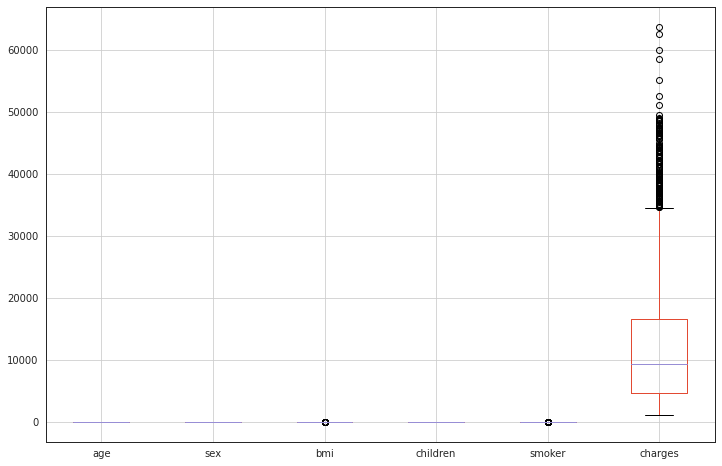

In [32]:
#Make a box-and-whisker plot from DataFrame columns, a method for graphically depicting groups of numerical data through their quartiles.
df.boxplot()

<AxesSubplot:>

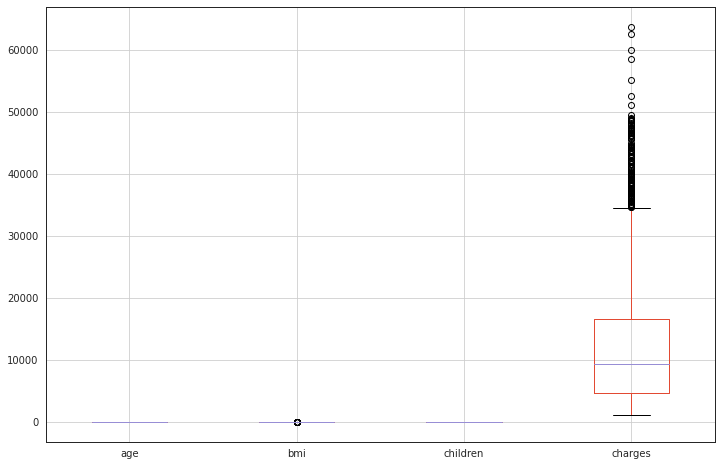

In [33]:
insurance.boxplot()

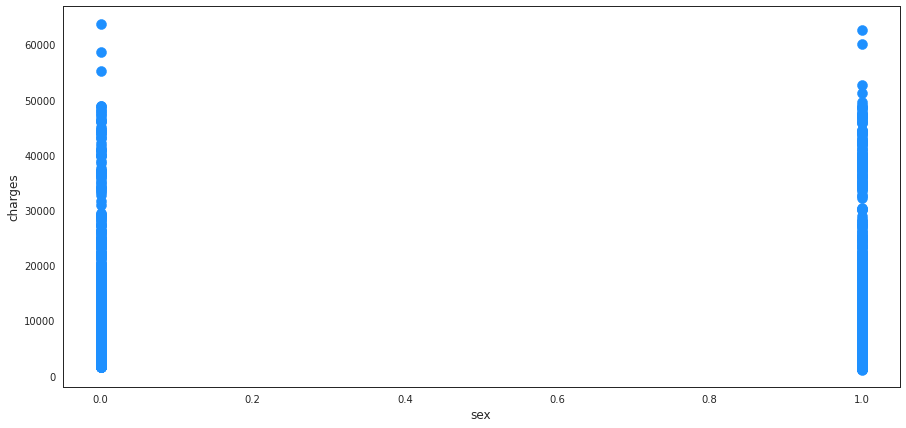

In [34]:
df.plot(x='sex', y='charges', kind='scatter', color='dodgerblue',\
        figsize=(15,7), s=100);

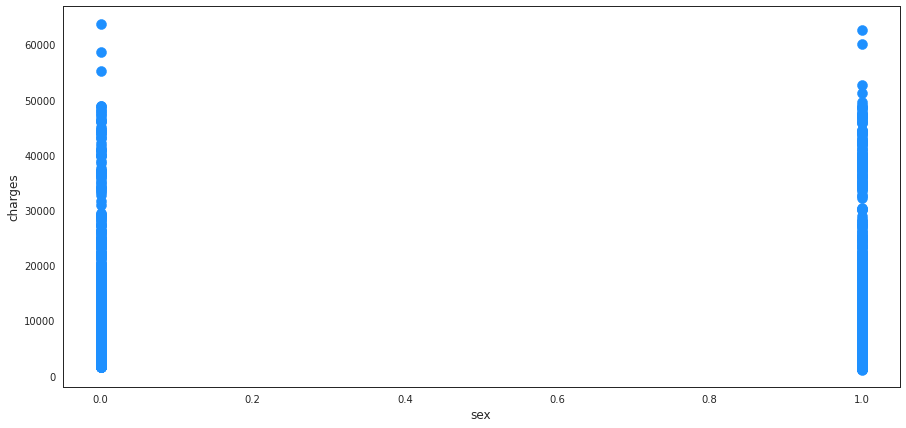

In [35]:
df.plot(x='sex', y='charges', kind='scatter', color='dodgerblue',\
        figsize=(15,7), s=100);

**As the visualisation in Python is not ideal, we proceed with using Tableau for our Data Visualisation. To ignore Step 3 onwards**